In [1]:
# Predictive Model for Sustainable Products (Python)

# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# read in product sales data and create data frame
susitems = pd.read_csv("Case3SalesProducts.csv")


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# print the first five rows of the data frame
print(pd.DataFrame.head(susitems))
susitemdf = pd.DataFrame(susitems)








         Country OrderMethod   RetailerType        ProductLine    ProductType  \
0  United States         Fax  Outdoors Shop  Camping Equipment   Cooking Gear   
1  United States         Fax  Outdoors Shop  Camping Equipment   Cooking Gear   
2  United States         Fax  Outdoors Shop  Camping Equipment          Tents   
3  United States         Fax  Outdoors Shop  Camping Equipment          Tents   
4  United States         Fax  Outdoors Shop  Camping Equipment  Sleeping Bags   

                     Product  Year  Quarter  SustainableClaim  \
0  TrailChef Deluxe Cook Set  2012  Q1 2012                 1   
1     TrailChef Double Flame  2012  Q1 2012                 0   
2                  Star Dome  2012  Q1 2012                 1   
3               Star Gazer 2  2012  Q1 2012                 1   
4            Hibernator Lite  2012  Q1 2012                 1   

   SustainableMarketing    Revenue  Quantity  GrossMargin  
0                     0   59628.66       489     0.347548  
1 

               Year  SustainableClaim  SustainableMarketing       Revenue  \
count  88475.000000      88475.000000          88475.000000  8.847500e+04   
mean    2012.855281          0.500808              0.643436  4.263829e+04   
std        0.778342          0.500002              0.478987  6.578402e+04   
min     2012.000000          0.000000              0.000000  0.000000e+00   
25%     2012.000000          0.000000              0.000000  8.184360e+03   
50%     2013.000000          1.000000              1.000000  2.102628e+04   
75%     2013.000000          1.000000              1.000000  5.039060e+04   
max     2014.000000          1.000000              1.000000  1.635688e+06   

           Quantity   GrossMargin      runiform  
count  88475.000000  87894.000000  88475.000000  
mean     780.586166      0.449718      0.500238  
std     1541.645422      0.123642      0.288669  
min        1.000000    -12.853678      0.000026  
25%      131.000000      0.369880      0.249922  
50%   

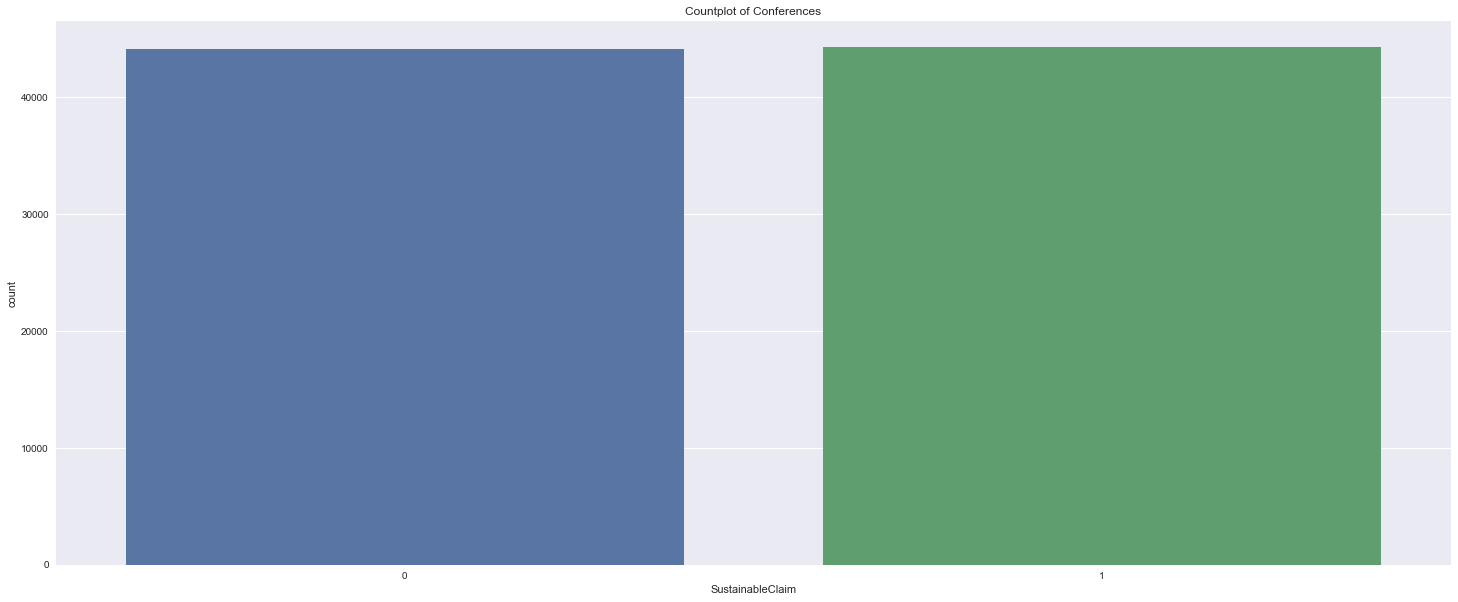

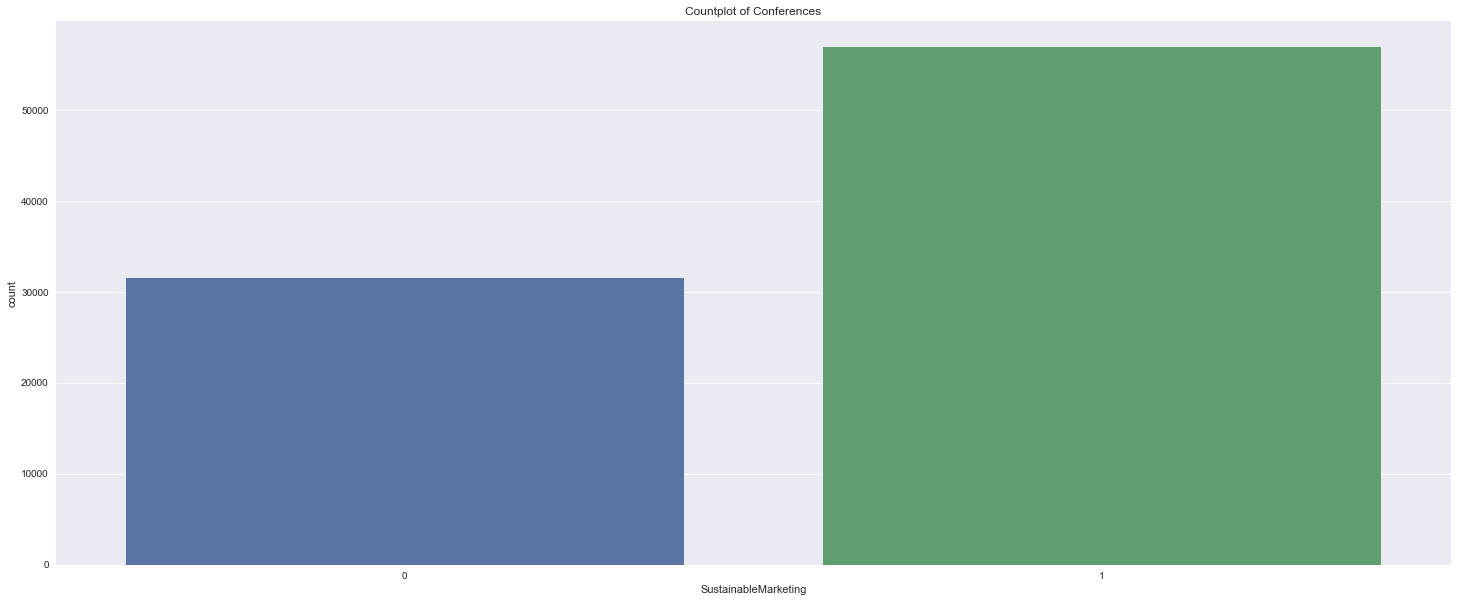

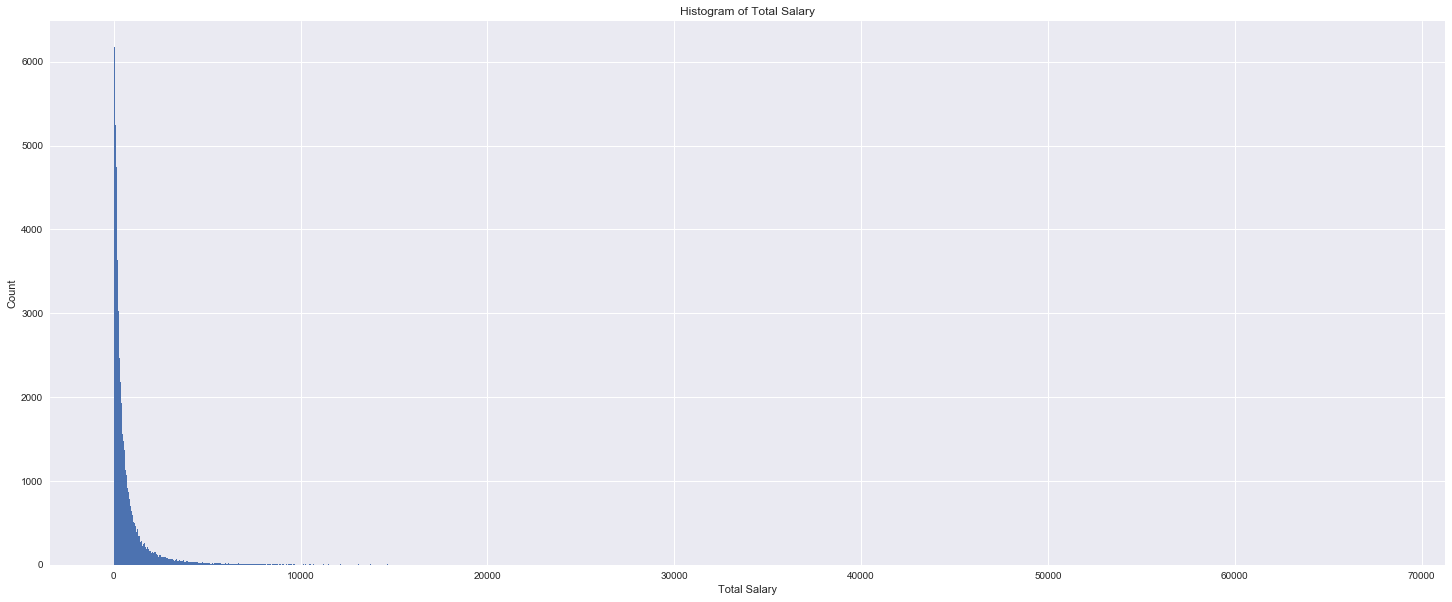

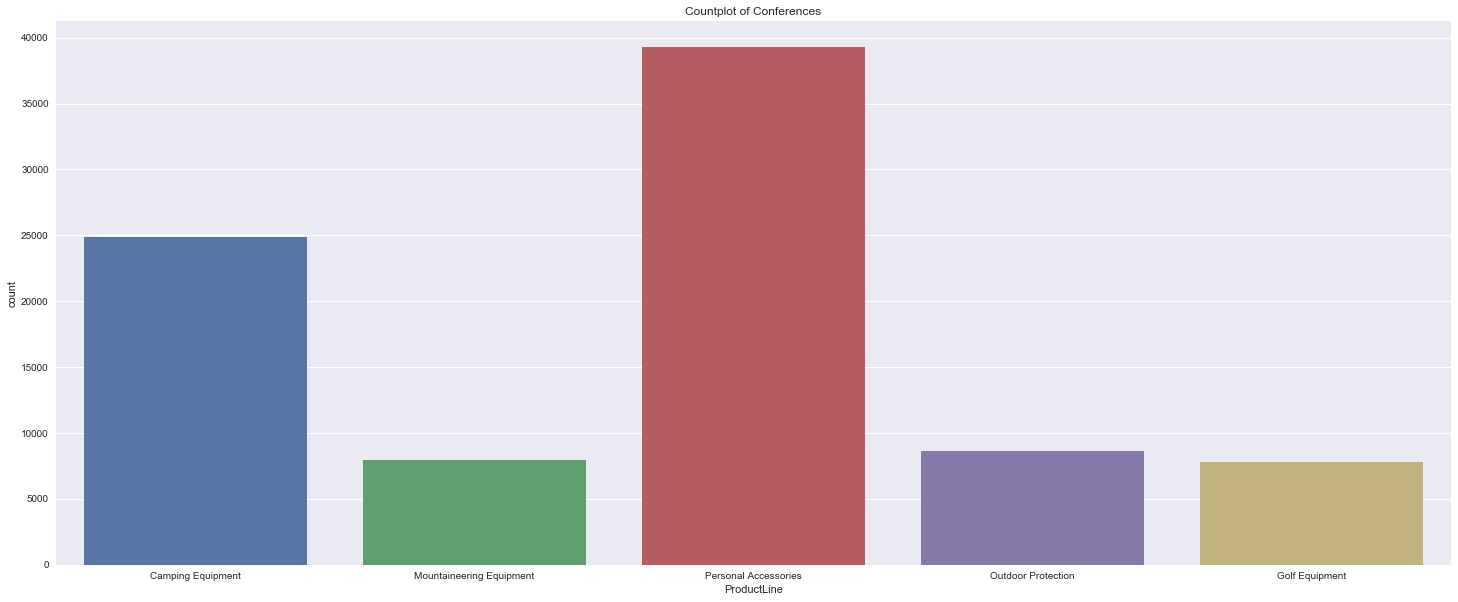

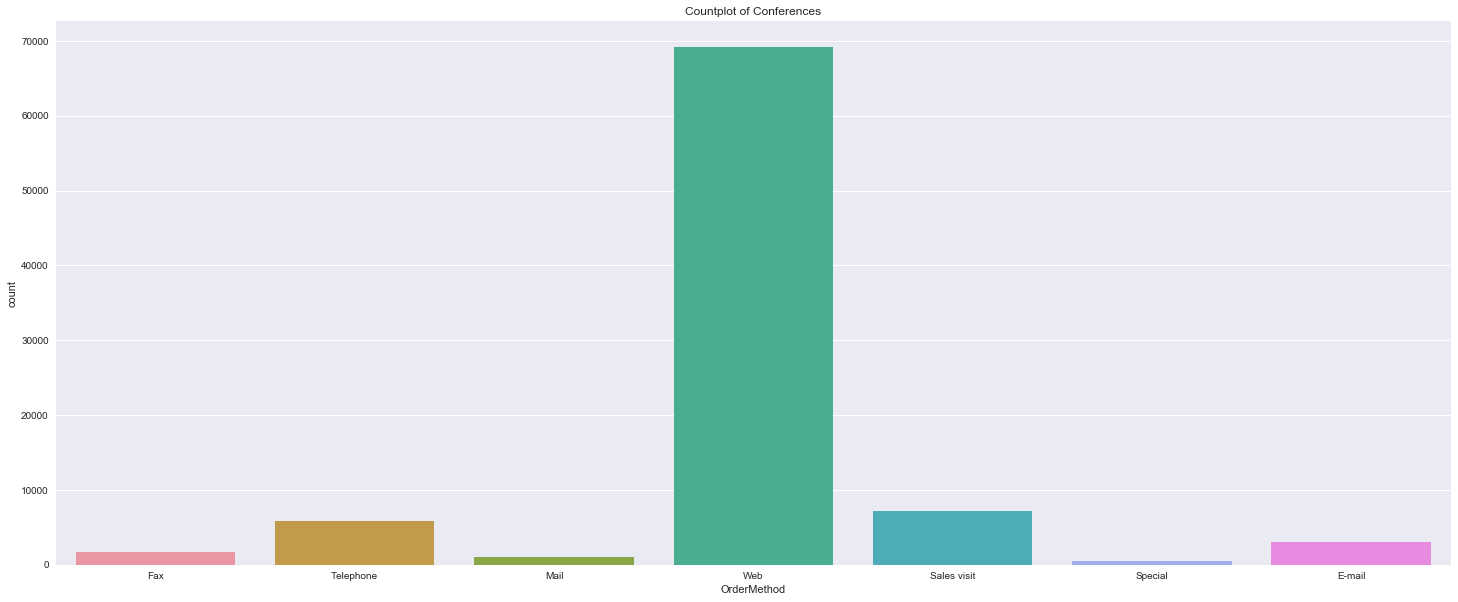

In [19]:
#print summary statistics
print(susitemdf.describe())

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
#Increase size of output plt
fig_size[0] = 25
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

sns.countplot(x= 'SustainableClaim',  data = susitemdf)
sns.set(style="darkgrid")
plt.title("Countplot of Conferences")
plt.show()

sns.countplot(x= 'SustainableMarketing',  data = susitemdf)
sns.set(style="darkgrid")
plt.title("Countplot of Conferences")
plt.show()

plt.hist(susitemdf['Quantity'], bins = 'auto')
plt.title("Histogram of Total Salary")
plt.xlabel("Total Salary")
plt.ylabel("Count")
plt.show()

sns.countplot(x= 'ProductLine',  data = susitemdf)
sns.set(style="darkgrid")
plt.title("Countplot of Conferences")
plt.show()

sns.countplot(x= 'OrderMethod',  data = susitemdf)
sns.set(style="darkgrid")
plt.title("Countplot of Conferences")
plt.show()


In [5]:
np.random.seed(1234)
susitemdf['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(susitemdf))
susitemdf_train = susitemdf[susitemdf['runiform'] >= 0.33]
susitemdf_test = susitemdf[susitemdf['runiform'] < 0.33]
# check training data frame
#print('\SusItems_train data frame (rows, columns): ',susitemdf_train.shape)
#print(susitemdf_train.head())
# check test data frame
#print('\SusItems_test data frame (rows, columns): ',susitemdf_test.shape)
#print(susitemdf_test.head())

# specify a simple model with bobblehead entered last
my_model = str('Revenue ~  SustainableClaim +  Quantity + Year + OrderMethod')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = susitemdf_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1157.
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:23:33   Log-Likelihood:            -7.3682e+05
No. Observations:               59273   AIC:                         1.474e+06
Df Residuals:                   59263   BIC:                         1.474e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [4]:
import statsmodels.formula.api as smf
model2 = smf.mixedlm("Revenue ~ SustainableClaim + SustainableMarketing", susitemdf_train, groups=susitemdf_train["RetailerType"])
  
model2f = model2.fit()

print(model2f.summary())

                   Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      Revenue        
No. Observations:      59273        Method:                  REML           
No. Groups:            8            Scale:                   4152335332.1217
Min. group size:       1144         Likelihood:              -740456.9507   
Max. group size:       16984        Converged:               Yes            
Mean group size:       7409.1                                               
----------------------------------------------------------------------------
                         Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------
Intercept                34224.764 3967.061  8.627 0.000 26449.468 42000.061
SustainableClaim         14363.789  794.859 18.071 0.000 12805.894 15921.684
SustainableMarketing     -6621.141  831.840 -7.960 0.000 -8251.517 -4990.764
groups RE          

In [ ]:
#Create bar plot showing salary in relation to conference 
plt.bar(susitemdf['Revenue'], susitemdf['SustainableClaim'])
plt.show()
